## Build a credit scoring model
### Data
"This dataset classifies people described by a set of attributes as good or bad credit risks. [It] comes in two formats (one all numeric). [It] also comes with a cost matrix" (https://archive.ics.uci.edu/ml/datasets/Statlog+(German+Credit+Data)).

Attribute 1: Salary per pay period for at least 1 year as recorded in a checking account with the bank (qualitative)<br>
A11 : ... < 0 DM<br>
A12 : 0 <= ... < 200 DM<br>
A13 : ... >= 200 DM<br>
A14 : no checking account<br>

Attribute 2: Loan duration in months (numerical)

Attribute 3: Credit history (qualitative)<br>
A30 : no loans taken/ all loans paid back duly<br>
A31 : all loans at this bank paid back duly<br>
A32 : existing loans paid back duly till now<br>
A33 : delay in paying off in the past<br>
A34 : critical account/ other loans existing with other financial services companies<br>

Attribute 4: Purpose of the load (qualitative)<br>
A40 : car (new)<br>
A41 : car (used)<br>
A42 : furniture/equipment<br>
A43 : radio/television<br>
A44 : domestic appliances<br>
A45 : repairs<br>
A46 : education<br>
A47 : vacation<br>
A48 : retraining<br>
A49 : business<br>
A410: others<br>

Attribute 5: Loan amount (numerical)

Attibute 6: Money in savings accounts/bonds (qualitative)<br>
A61 : ... < 100 DM<br>
A62 : 100 <= ... < 500 DM<br>
A63 : 500 <= ... < 1000 DM<br>
A64 : .. >= 1000 DM<br>
A65 : unknown or no savings account<br>

Attribute 7: Tenure in present employment (qualitative)<br>
A71 : unemployed<br>
A72 : ... < 1 year<br>
A73 : 1 <= ... < 4 years<br>
A74 : 4 <= ... < 7 years<br>
A75 : .. >= 7 years<br>

Attribute 8: Installment rate as percentage of disposable income (numerical)

Attribute 9: Civil status and sex (qualitative)<br>
A91 : male : divorced/separated<br>
A92 : female : divorced/separated/married<br>
A93 : male : single<br>
A94 : male : married/widowed<br>
A95 : female : single<br>

Attribute 10: Other debtors / guarantors (qualitative)<br>
A101 : none<br>
A102 : co-applicant<br>
A103 : guarantor<br>

Attribute 11: Tenure in present residence in years (numerical)

Attribute 12: Assets (qualitative)<br>
A121 : real estate<br>
A122 : if not A121 : building society savings agreement/ life insurance<br>
A123 : if not A121/A122 : car or other, but not money in savings accounts or bonds<br>
A124 : unknown / no assets<br>

Attribute 13: Age in years (numerical)

Attribute 14: Access to other installment plans (qualitative)<br>
A141 : bank<br>
A142 : stores<br>
A143 : none<br>

Attribute 15: Housing (qualitative)<br>
A151 : rent<br>
A152 : own<br>
A153 : for free<br>

Attribute 16: Number of existing loans at this bank (numerical)

Attribute 17: Employment (qualitative)<br>
A171 : unemployed/ unskilled - non-resident<br>
A172 : unskilled - resident<br>
A173 : skilled employee / official<br>
A174 : management/ self-employed/ highly qualified employee/ officer<br>

Attribute 18: Number of people being financially supporting (numerical)

Attribute 19: Telephone (qualitative)<br>
A191 : none<br>
A192 : yes, registered under the customer's name<br>

Attribute 20: Foreign worker (qualitative)<br>
A201 : yes<br>
A202 : no<br>

Attribute 21: Default (qualitative)<br>
1 : no<br>
2 : yes<br>

Cost Matrix<br>
0 : Did not default|predicted to not default<br>
0 : Defaulted|predicted to default<br>
1 : Did not default|predicted to default<br>
5 : Defaulted|predicted to not default<br>

### Task 1: Load data into R

In [1]:
raw <- read.csv(file='https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', 
                header=FALSE, sep=" ")
str(raw)

'data.frame':	1000 obs. of  21 variables:
 $ V1 : Factor w/ 4 levels "A11","A12","A13",..: 1 2 4 1 1 4 4 2 4 2 ...
 $ V2 : int  6 48 12 42 24 36 24 36 12 30 ...
 $ V3 : Factor w/ 5 levels "A30","A31","A32",..: 5 3 5 3 4 3 3 3 3 5 ...
 $ V4 : Factor w/ 10 levels "A40","A41","A410",..: 5 5 8 4 1 8 4 2 5 1 ...
 $ V5 : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ V6 : Factor w/ 5 levels "A61","A62","A63",..: 5 1 1 1 1 5 3 1 4 1 ...
 $ V7 : Factor w/ 5 levels "A71","A72","A73",..: 5 3 4 4 3 3 5 3 4 1 ...
 $ V8 : int  4 2 2 2 3 2 3 2 2 4 ...
 $ V9 : Factor w/ 4 levels "A91","A92","A93",..: 3 2 3 3 3 3 3 3 1 4 ...
 $ V10: Factor w/ 3 levels "A101","A102",..: 1 1 1 3 1 1 1 1 1 1 ...
 $ V11: int  4 2 3 4 4 4 4 2 4 2 ...
 $ V12: Factor w/ 4 levels "A121","A122",..: 1 1 1 2 4 4 2 3 1 3 ...
 $ V13: int  67 22 49 45 53 35 53 35 61 28 ...
 $ V14: Factor w/ 3 levels "A141","A142",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ V15: Factor w/ 3 levels "A151","A152",..: 2 2 2 3 3 3 2 1 2 2 ...
 $ V16: 

### Task 2: Convert some columns to categorical

In [2]:
raw$V21 <- as.factor(raw$V21)

### Task 3: Separate training, validation, and testing sets

In [3]:
set.seed(12345)
ident <- sample(c('train','valid','test'), prob=c(0.70,0.15,0.15), replace=TRUE, size=nrow(raw))
table(ident)
trainSet <- raw[ident == 'train',]
validSet <- raw[ident == 'valid',]
testSet  <- raw[ident == 'test' ,]

ident
 test train valid 
  165   687   148 

### Task 4: Fit a logistic regression model

In [4]:
model.lr <- glm(V21 ~ ., data=trainSet, family='binomial')

### Task 5: Check the sanity of the model

In [5]:
summary(model.lr)


Call:
glm(formula = V21 ~ ., family = "binomial", data = trainSet)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2623  -0.6747  -0.3450   0.6899   2.5595  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.140e+00  1.314e+00   0.867 0.385842    
V1A12       -6.479e-01  2.659e-01  -2.436 0.014836 *  
V1A13       -1.413e+00  4.437e-01  -3.185 0.001446 ** 
V1A14       -2.079e+00  2.883e-01  -7.211 5.55e-13 ***
V2           2.740e-02  1.146e-02   2.391 0.016785 *  
V3A31        7.166e-01  6.813e-01   1.052 0.292913    
V3A32       -3.811e-01  5.487e-01  -0.695 0.487315    
V3A33       -1.081e-01  5.928e-01  -0.182 0.855330    
V3A34       -1.071e+00  5.609e-01  -1.910 0.056192 .  
V4A41       -2.045e+00  4.739e-01  -4.316 1.59e-05 ***
V4A410      -1.902e+00  9.453e-01  -2.012 0.044206 *  
V4A42       -7.949e-01  3.236e-01  -2.457 0.014028 *  
V4A43       -1.085e+00  3.037e-01  -3.572 0.000354 ***
V4A44       -1.085e+00  8.538e-01

### Task 6: Perform some predictions

In [6]:
pred <- predict(model.lr, newdata=validSet, type='response')
head(pred)
actl <- validSet$V21
table(actl,ifelse(pred <= 0.5, 1, 2))

2         4        10        20        23        37 
0.6721867 0.2952584 0.7148718 0.1531898 0.1177951 0.3853706

    
actl  1  2
   1 94 13
   2 20 21

### Task 7: Compute for the area under the receiver operating characteristic curve

Installing package into 'C:/Users/jbrilliantes/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'ROCR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jbrilliantes\AppData\Local\Temp\RtmpOikEOB\downloaded_packages


Loading required package: gplots
Warning message:
"package 'gplots' was built under R version 3.4.3"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



[1] 0.800775

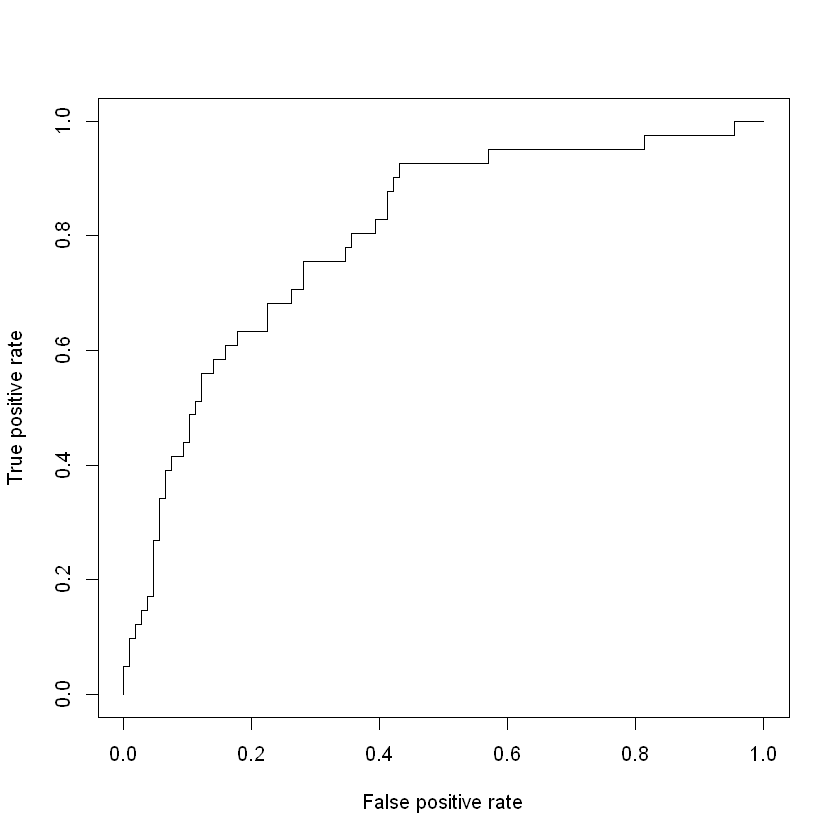

In [7]:
install.packages('ROCR')
library(ROCR)
as.numeric(performance(prediction(pred, actl), 'auc')@y.values)
plot(performance(prediction(pred, actl), 'tpr','fpr'))

The True positive rate (TP) is the proportion of positive cases that were correctly identified.<br>
The False positive rate (FP) is the proportion of negative cases that were incorrectly classified as positive.<br>
We can change our cut-off of 0.5 in our definition of Default. There are infinitely many cut-offs between 0 and 1, and each cut-off has a (FP, TP) pair. The collection of (FP, TP) pairs can be used to plot the ROC curve.